In [1]:
import pandas as pd
from dotenv import load_dotenv

# Explicitly providing path to '.env'
from pathlib import Path  # Python 3.6+ only
# Load .env variables
_ = load_dotenv(dotenv_path=f"{Path().resolve().parents[1]}/src/.env")

# with the new api
from importnb import imports
with imports("ipynb"):
    from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

# Sorting by Descending
df_pm25_clean = df_pm25_clean.sort_values(by='DATETIME', ascending=False)

df_pm25_clean.head()

2023-12-15 15:38:05.225 | DEBUG    | utils:df_from_csv:340 - Load DataFrame: /home/sebaxtian/Workspaces/Tangara/tangara-evaluation/src/data/1_clean/pm25_clean.csv


TANGARA_3B7E    float64
TANGARA_3BEA    float64
TANGARA_421A    float64
TANGARA_422A    float64
TANGARA_5636    float64
TANGARA_D282    float64
dtype: object


,TANGARA_3B7E,TANGARA_3BEA,TANGARA_421A,TANGARA_422A,TANGARA_5636,TANGARA_D282
DATETIME,,,,,,
2023-12-10 23:59:30-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 23:59:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-10 23:58:30-05:00,13.0,13.0,12.0,NaN,12.0,13.0
2023-12-10 23:58:00-05:00,14.0,13.0,12.0,14.0,12.0,14.0
2023-12-10 23:57:30-05:00,14.0,14.0,12.0,13.0,13.0,14.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_3B7E,TANGARA_3BEA,TANGARA_421A,TANGARA_422A,TANGARA_5636,TANGARA_D282
count,39204.000000,38828.000000,38713.000000,38244.000000,38339.000000,38697.000000
mean,11.963958,11.386963,10.675974,10.755831,11.286079,12.175492
std,5.843524,5.664923,5.360653,5.355944,5.474602,6.106629
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000
50%,11.000000,11.000000,10.000000,10.000000,11.000000,12.000000
75%,16.000000,15.000000,14.000000,15.000000,15.000000,16.000000
max,29.000000,29.000000,28.000000,27.000000,27.000000,32.000000


## Group by hour on DATETIME and resample by mean

In [4]:
# Resample mean grouping by hour on DATETIME
df_pm25_clean = df_pm25_clean.resample('H').mean()

# Sorting by Descending
df_pm25_clean = df_pm25_clean.sort_values(by='DATETIME', ascending=False)

df_pm25_clean.head()

,TANGARA_3B7E,TANGARA_3BEA,TANGARA_421A,TANGARA_422A,TANGARA_5636,TANGARA_D282
DATETIME,,,,,,
2023-12-10 23:00:00-05:00,10.974576,10.771186,10.245763,10.287356,10.406780,11.152542
2023-12-10 22:00:00-05:00,16.529412,16.042735,15.237288,15.179487,15.453782,16.883333
2023-12-10 21:00:00-05:00,15.508333,14.950000,14.243697,14.000000,14.133333,15.558333
2023-12-10 20:00:00-05:00,17.754902,17.404255,16.174419,15.616667,16.478261,18.137255
2023-12-10 19:00:00-05:00,14.009804,14.351351,13.220930,12.842105,13.147727,14.349515


## Descriptive Statistics

In [5]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_3B7E,TANGARA_3BEA,TANGARA_421A,TANGARA_422A,TANGARA_5636,TANGARA_D282
count,354.000000,353.000000,354.000000,353.000000,352.000000,354.000000
mean,12.110828,11.560799,10.841980,10.986644,11.493198,12.280019
std,5.718897,5.517250,5.228937,5.193227,5.338689,5.884870
min,1.102564,1.067227,1.050420,1.059829,1.067797,1.058824
25%,7.813270,7.380952,6.748319,7.075630,7.363487,7.841957
50%,11.366239,10.811966,10.227923,10.324324,10.818651,11.465385
75%,16.084393,15.201754,14.314827,14.543103,15.325624,16.237237
max,28.857143,28.928571,27.500000,26.769231,26.750000,30.650000


## Movil 24h, Rolling Function in Pandas

In [6]:
# Movil 24h, Rolling Function in Pandas
df_pm25_clean = df_pm25_clean.rolling(window=24, min_periods=1).mean()

df_pm25_clean.head()

,TANGARA_3B7E,TANGARA_3BEA,TANGARA_421A,TANGARA_422A,TANGARA_5636,TANGARA_D282
DATETIME,,,,,,
2023-12-10 23:00:00-05:00,10.974576,10.771186,10.245763,10.287356,10.406780,11.152542
2023-12-10 22:00:00-05:00,13.751994,13.406961,12.741525,12.733422,12.930281,14.017938
2023-12-10 21:00:00-05:00,14.337440,13.921307,13.242249,13.155615,13.331298,14.531403
2023-12-10 20:00:00-05:00,15.191806,14.792044,13.975292,13.770878,14.118039,15.432866
2023-12-10 19:00:00-05:00,14.955405,14.703906,13.824419,13.585123,13.923977,15.216196


## Descriptive Statistics

In [7]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_3B7E,TANGARA_3BEA,TANGARA_421A,TANGARA_422A,TANGARA_5636,TANGARA_D282
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,12.248770,11.692719,10.967692,11.103378,11.596526,12.415207
std,3.161300,3.064634,2.971693,2.858333,2.888508,3.258033
min,6.475232,6.120184,5.673534,5.920132,6.249273,6.479207
25%,9.878245,9.320718,8.643433,8.853940,9.402494,9.902538
50%,12.078040,11.547782,10.829658,10.972676,11.546728,12.215420
75%,15.028211,14.227425,13.253867,13.566983,14.233781,15.202260
max,17.866739,17.236581,16.470059,16.207800,16.670988,18.302280


## Filter just the last 24 hours

In [8]:
# Sorting by Ascending
df_pm25_clean = df_pm25_clean.sort_values(by='DATETIME', ascending=True)

# Filter just the las 24 hours
df_pm25_clean = df_pm25_clean.loc[df_pm25_clean.index >= df_pm25_clean.index[0] + pd.Timedelta(hours=24)]

df_pm25_clean.head()

,TANGARA_3B7E,TANGARA_3BEA,TANGARA_421A,TANGARA_422A,TANGARA_5636,TANGARA_D282
DATETIME,,,,,,
2023-11-27 00:00:00-05:00,11.070338,10.438925,10.036237,9.874718,10.585437,11.189278
2023-11-27 01:00:00-05:00,11.082518,10.457983,10.044741,9.889073,10.601510,11.208158
2023-11-27 02:00:00-05:00,11.063420,10.442805,10.027380,9.886091,10.584497,11.191492
2023-11-27 03:00:00-05:00,11.039809,10.422707,10.007825,9.871534,10.569400,11.164408
2023-11-27 04:00:00-05:00,11.143629,10.529089,10.098118,9.969104,10.669747,11.273238


In [9]:
df_pm25_clean.tail()

,TANGARA_3B7E,TANGARA_3BEA,TANGARA_421A,TANGARA_422A,TANGARA_5636,TANGARA_D282
DATETIME,,,,,,
2023-12-10 19:00:00-05:00,14.955405,14.703906,13.824419,13.585123,13.923977,15.216196
2023-12-10 20:00:00-05:00,15.191806,14.792044,13.975292,13.770878,14.118039,15.432866
2023-12-10 21:00:00-05:00,14.337440,13.921307,13.242249,13.155615,13.331298,14.531403
2023-12-10 22:00:00-05:00,13.751994,13.406961,12.741525,12.733422,12.930281,14.017938
2023-12-10 23:00:00-05:00,10.974576,10.771186,10.245763,10.287356,10.406780,11.152542


## Descriptive Statistics

In [10]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_3B7E,TANGARA_3BEA,TANGARA_421A,TANGARA_422A,TANGARA_5636,TANGARA_D282
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,12.413072,11.854624,11.101780,11.257785,11.743089,12.582761
std,3.204421,3.105461,3.028079,2.893882,2.930795,3.304292
min,6.475232,6.120184,5.673534,5.920132,6.249273,6.479207
25%,10.017151,9.615052,8.766249,9.150124,9.660504,10.144707
50%,12.435206,11.983146,11.242539,11.350844,11.944994,12.625002
75%,15.189491,14.475831,13.425287,13.736683,14.344036,15.425543
max,17.866739,17.236581,16.470059,16.207800,16.670988,18.302280


## PM2.5 to AQI

In [11]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

2023-12-15 15:38:05.572 | DEBUG    | utils:df_pm25_to_df_aqi:677 - PM2.5 DataFrame Sensors to AQI DataFrame Sensors: <class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336 entries, 2023-11-27 00:00:00-05:00 to 2023-12-10 23:00:00-05:00
Freq: H
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   TANGARA_3B7E  336 non-null    Int64
 1   TANGARA_3BEA  336 non-null    Int64
 2   TANGARA_421A  336 non-null    Int64
 3   TANGARA_422A  336 non-null    Int64
 4   TANGARA_5636  336 non-null    Int64
 5   TANGARA_D282  336 non-null    Int64
dtypes: Int64(6)
memory usage: 20.3 KB



,TANGARA_3B7E,TANGARA_3BEA,TANGARA_421A,TANGARA_422A,TANGARA_5636,TANGARA_D282
DATETIME,,,,,,
2023-11-27 00:00:00-05:00,47.0,44.0,42.0,42.0,45.0,47.0
2023-11-27 01:00:00-05:00,47.0,44.0,42.0,42.0,45.0,47.0
2023-11-27 02:00:00-05:00,47.0,44.0,42.0,42.0,45.0,47.0
2023-11-27 03:00:00-05:00,46.0,44.0,42.0,42.0,45.0,47.0
2023-11-27 04:00:00-05:00,47.0,44.0,43.0,42.0,45.0,48.0


## Describe Statistics

In [12]:
# Describe Data
df_aqi.describe()

,TANGARA_3B7E,TANGARA_3BEA,TANGARA_421A,TANGARA_422A,TANGARA_5636,TANGARA_D282
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,49.380952,47.687500,45.297619,45.964286,47.520833,49.827381
std,10.429470,10.550262,10.919001,10.402005,10.188061,10.615954
min,28.000000,26.000000,24.000000,25.000000,26.000000,28.000000
25%,42.000000,40.000000,37.000000,38.750000,41.000000,43.000000
50%,52.000000,50.000000,47.000000,48.000000,50.000000,53.000000
75%,58.000000,57.000000,54.000000,55.000000,56.000000,58.000000
max,64.000000,62.000000,61.000000,60.000000,61.000000,65.000000


## Histograms

2023-12-15 15:38:06.838 | DEBUG    | utils:plot_hist:512 - Plot Histograms: True


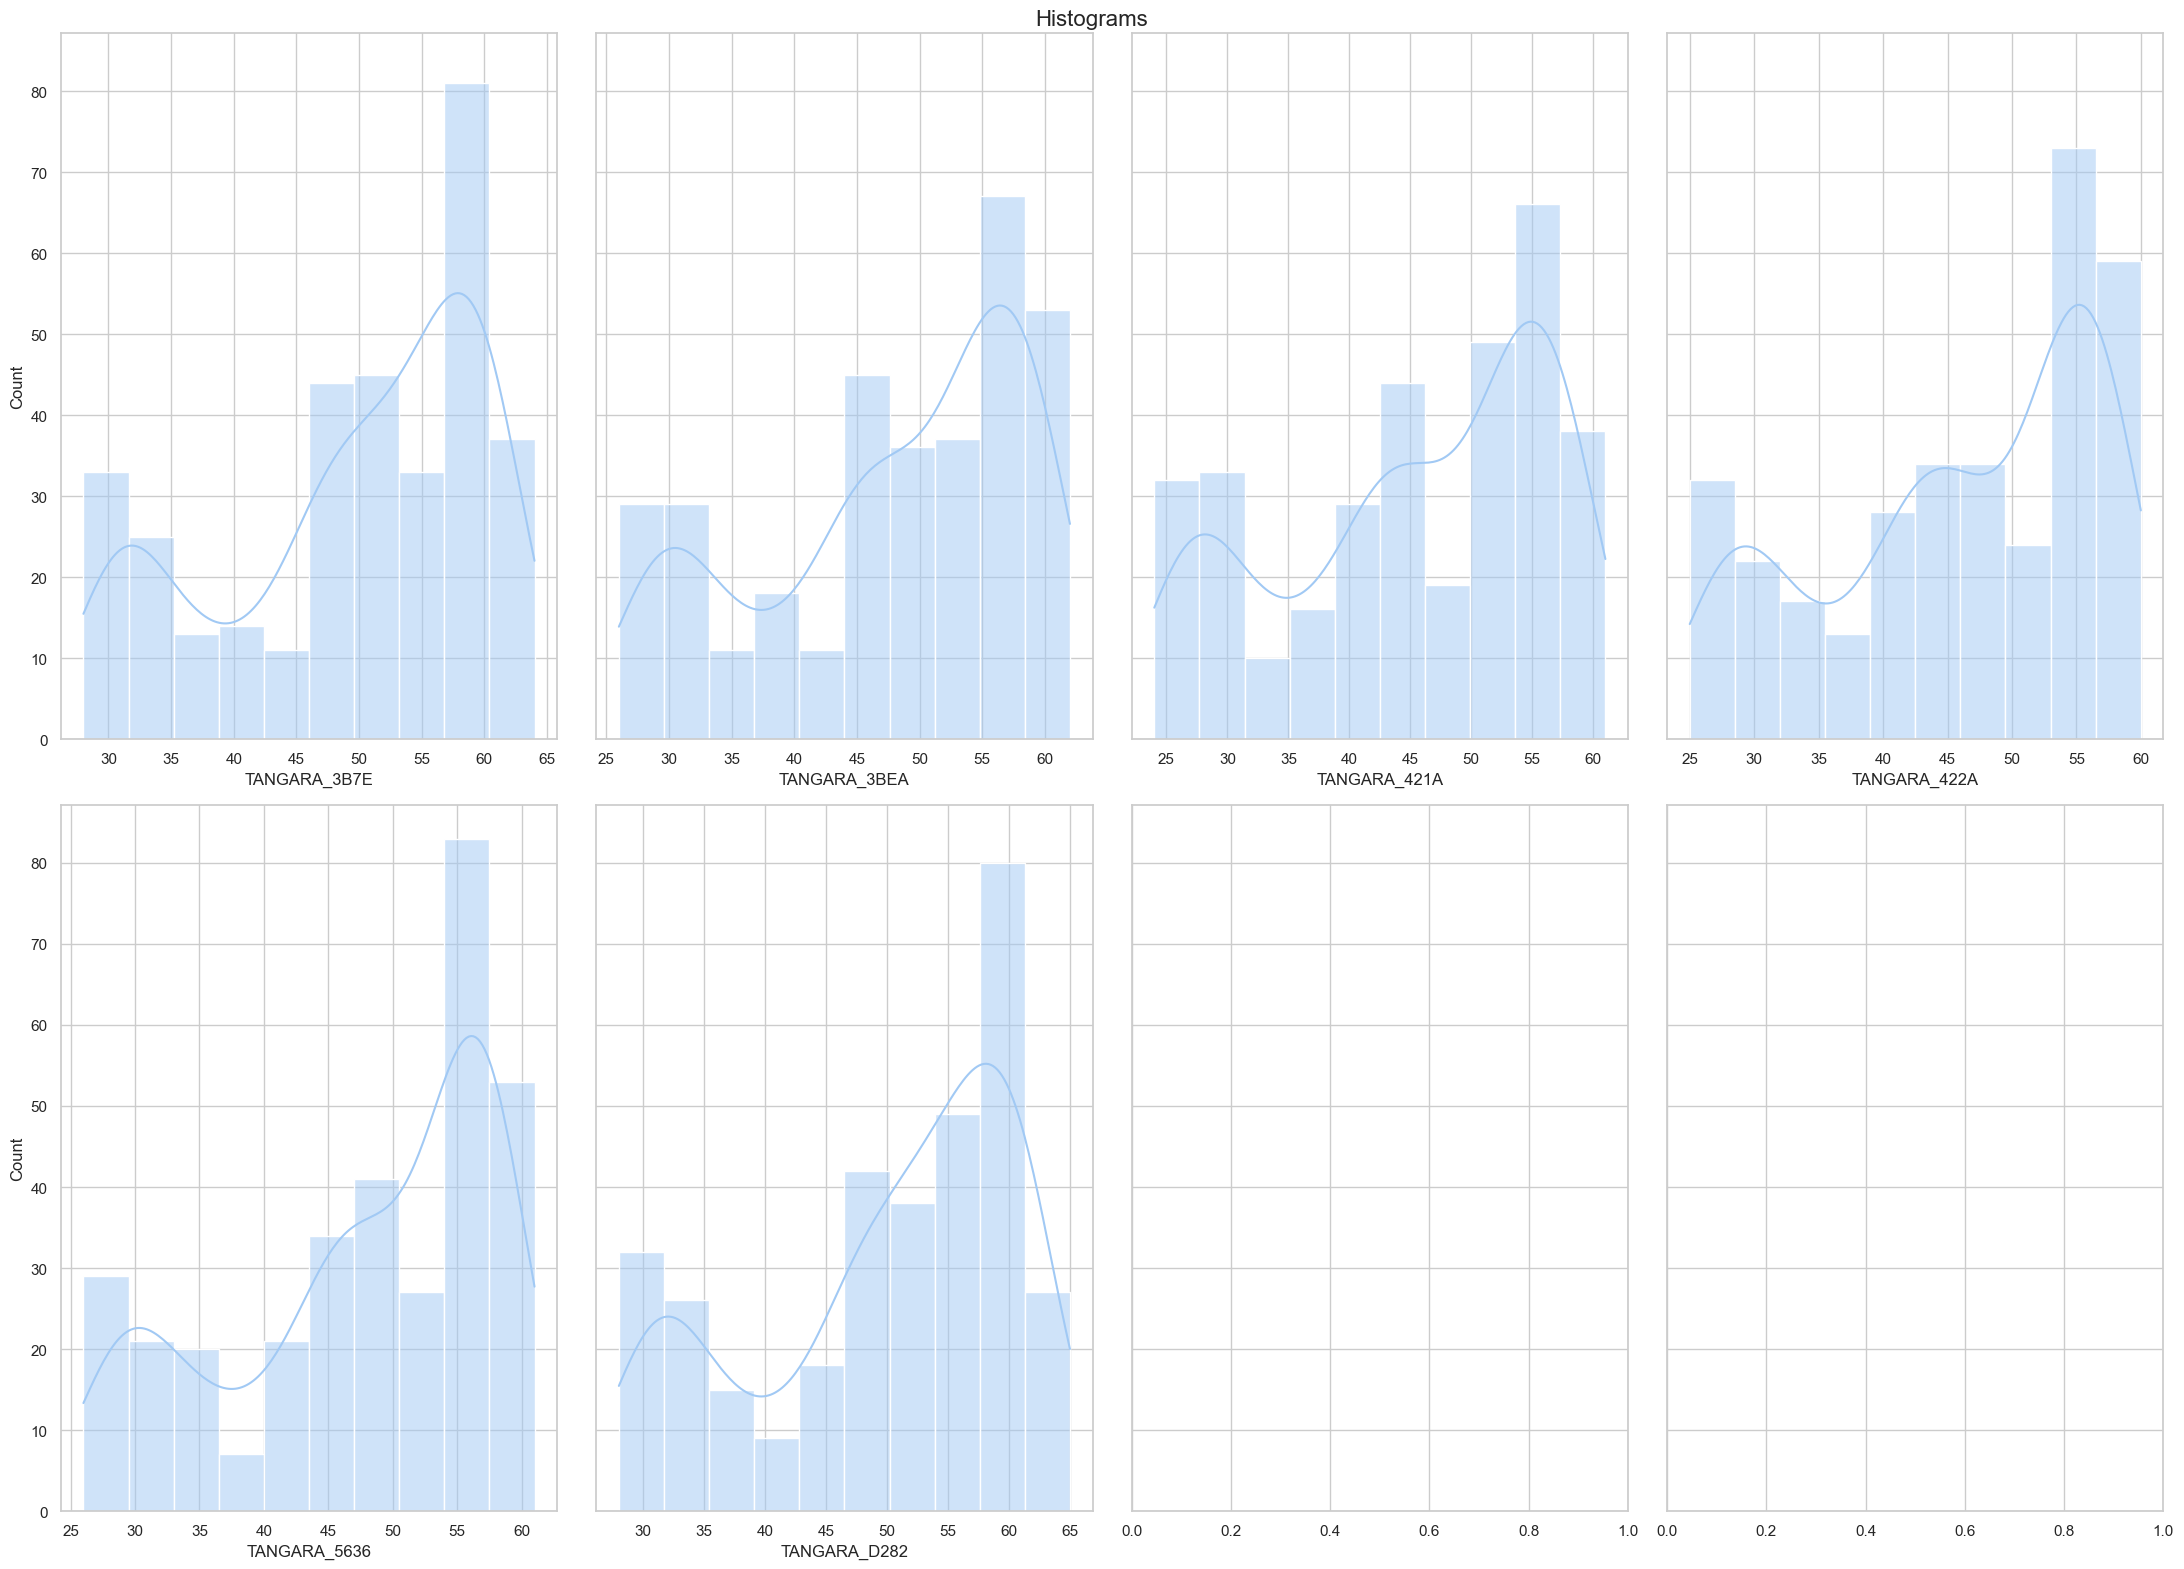

In [13]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

2023-12-15 15:38:11.813 | DEBUG    | utils:plot_boxes:545 - Plot Boxplots: True


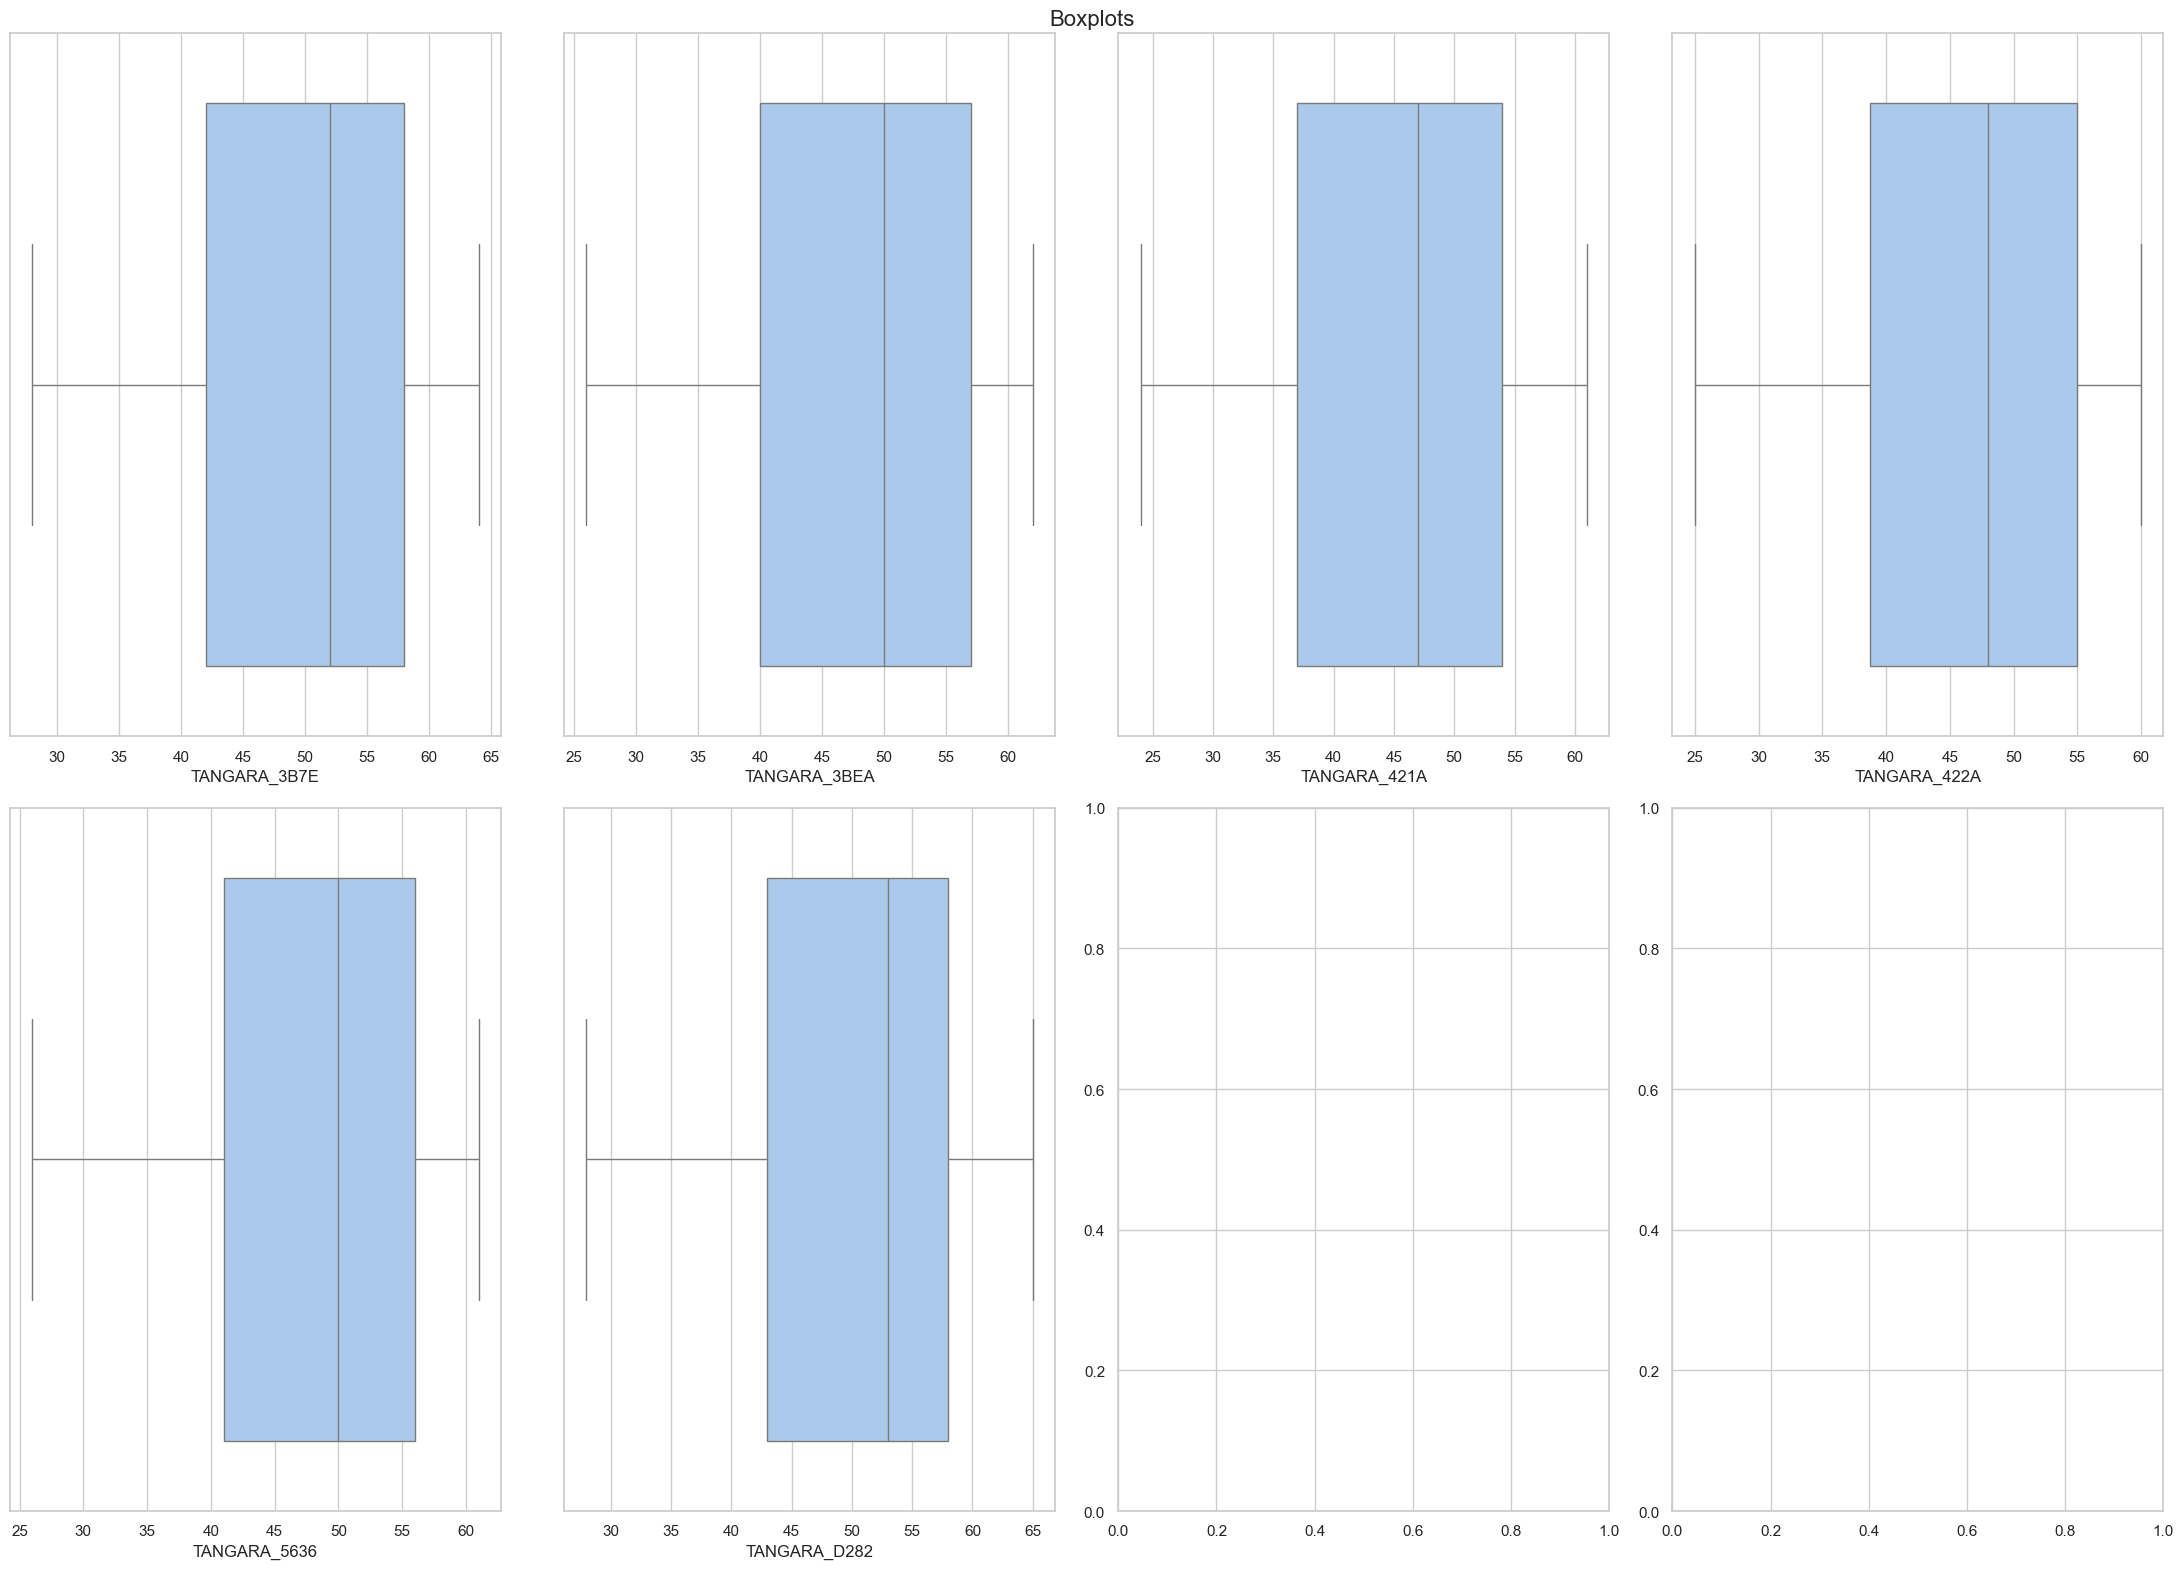

In [14]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

2023-12-15 15:38:15.948 | DEBUG    | utils:plot_lines:586 - Plot Lineplots: True


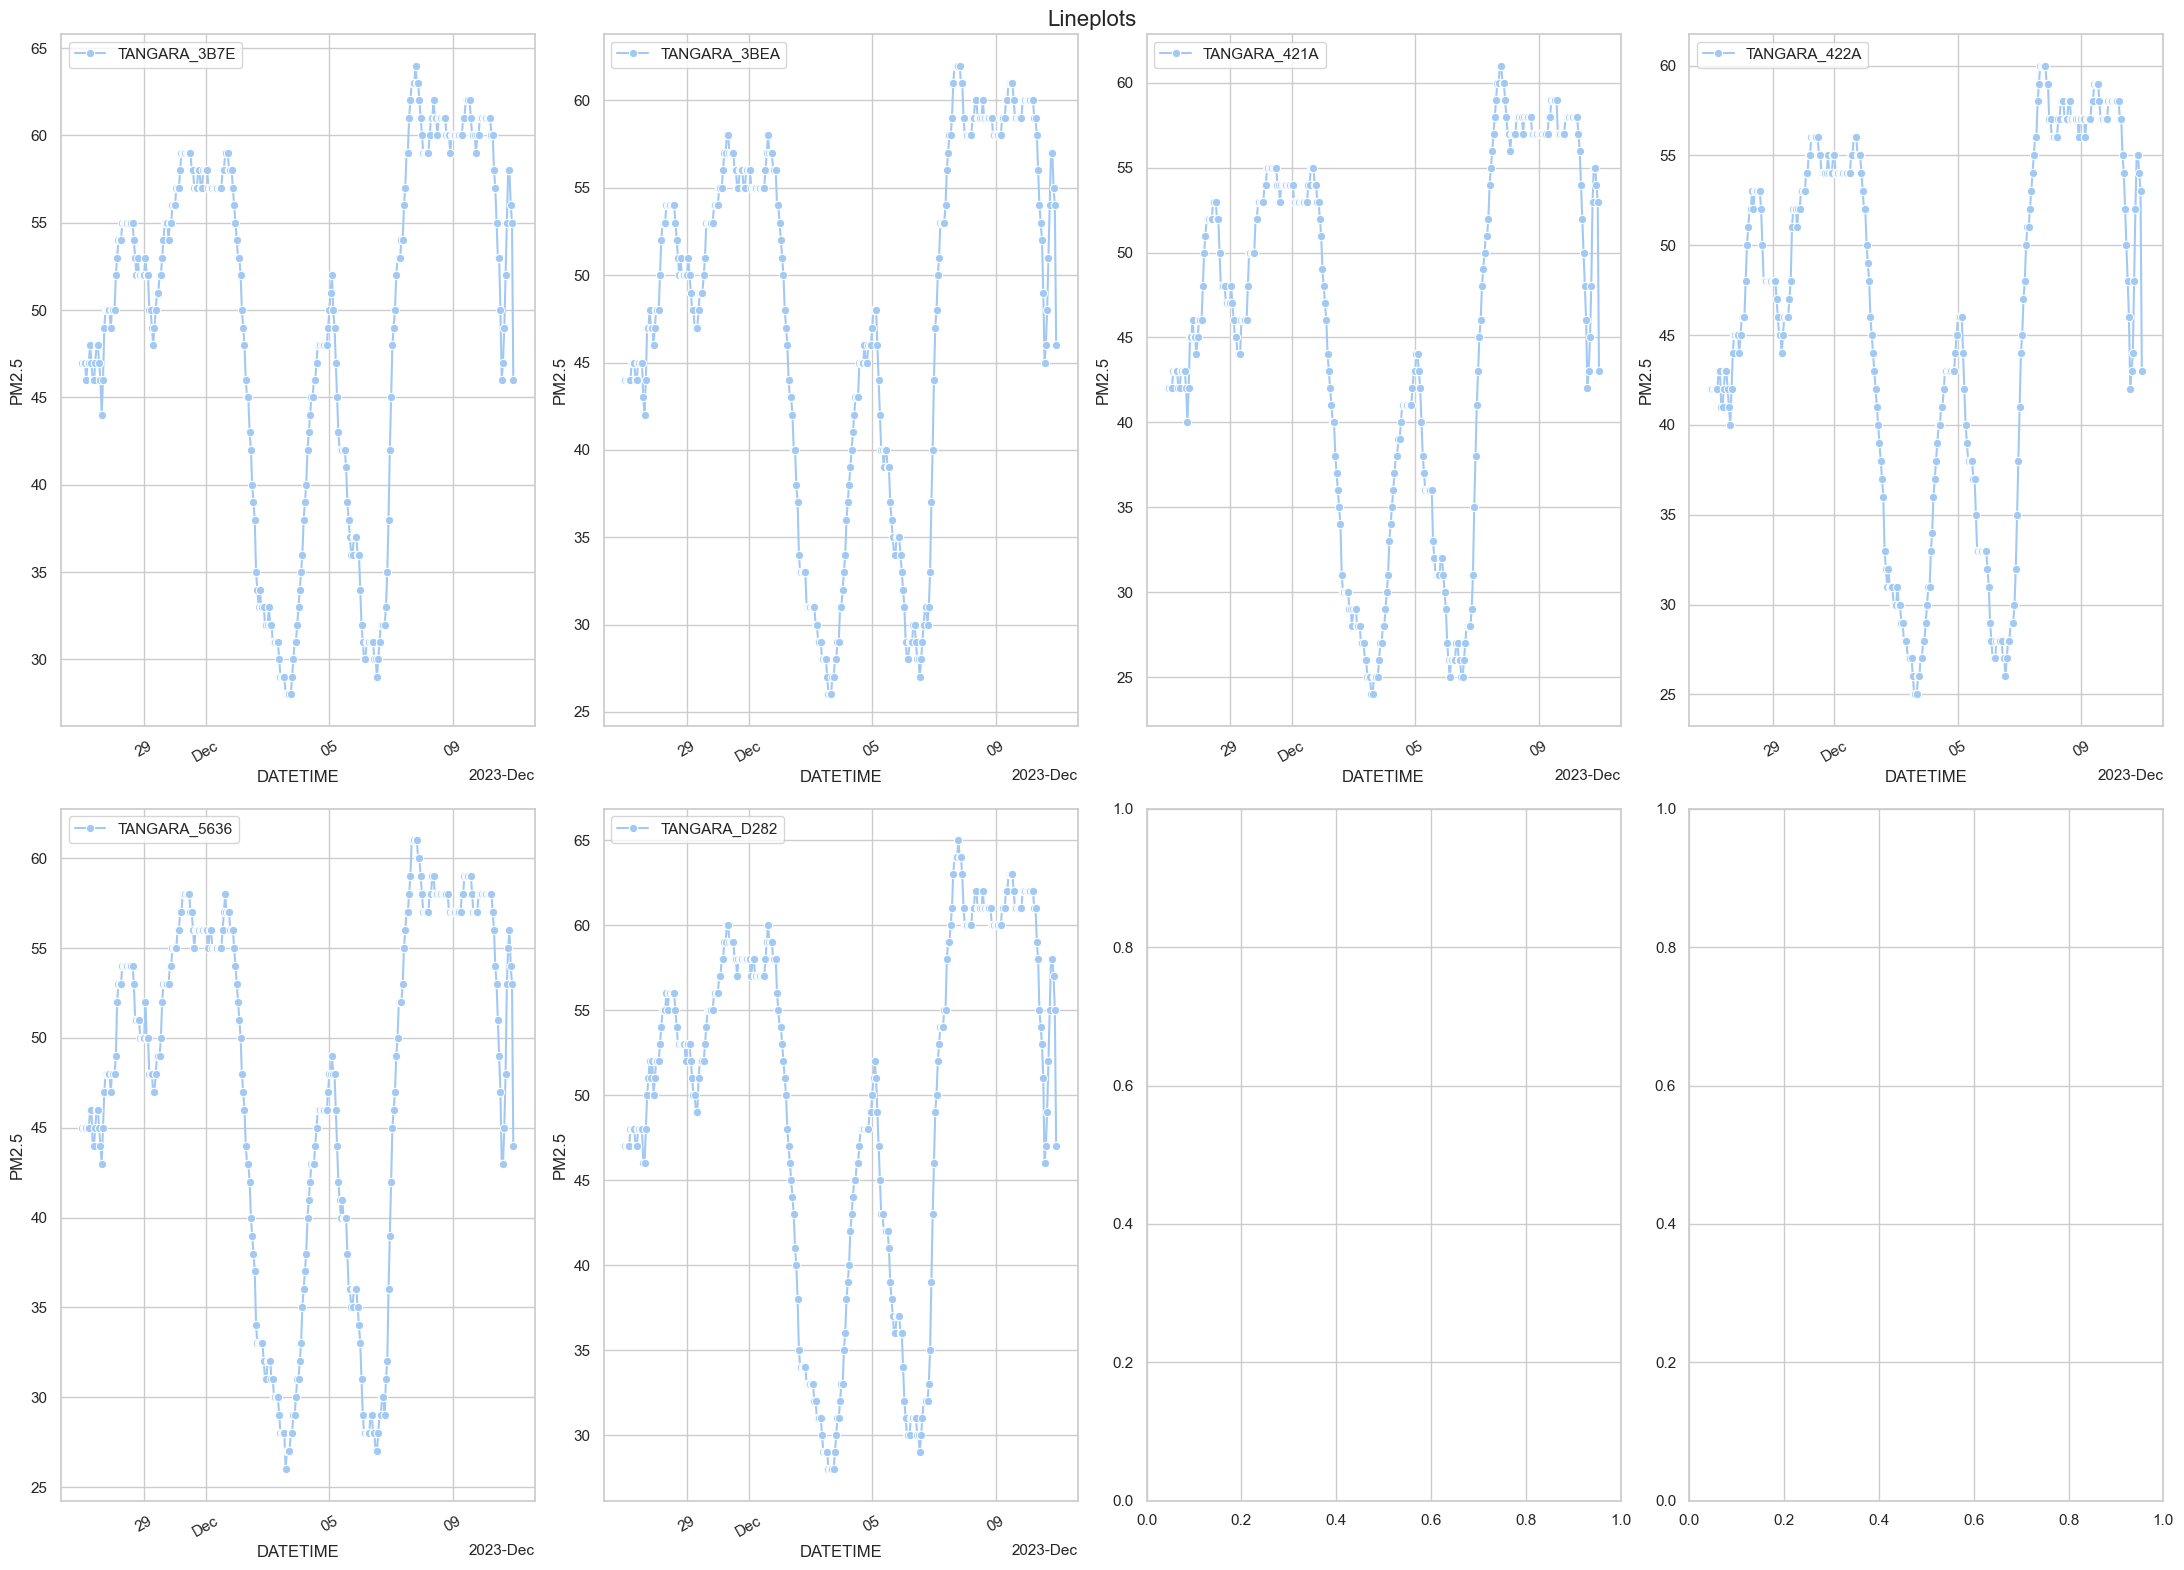

In [15]:
# Plot Lineplots
plot_lines(df_aqi)

In [16]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='2_features')

2023-12-15 15:38:21.627 | DEBUG    | utils:df_to_csv:311 - Save DataFrame: /home/sebaxtian/Workspaces/Tangara/tangara-evaluation/src/data/2_features/aqi.csv
